### The Assignment is all about predicting the price of the cars from the significant features which can dominate in modelling.

#### We will start by loading all the important libraries required for model building ,preprocessing and evaluating the models.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Importing the required libraries for plots.
#import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

#### Reading the dataset and seeing the fir few rows

In [2]:
dataset =pd.read_csv("CarPrice_Assignment.csv")
dataset.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


### We can clearly see that the CarName column has two features
    -1.Name of company 
    -2.Name of model.
     So, we will create two more  columns to hold the Company name and model name and finally deleting the column CarName.

In [3]:
dataset['Carcompany'] =dataset['CarName'].apply(lambda x :x.split(" ")[0])
dataset['Carmodel'] =dataset['CarName'].apply(lambda x :x.split(" ")[-1])

In [4]:
dataset =dataset.drop(["CarName"],axis =1)

### Exploring the dataset shape and other information
    -shape
    -describe
    -columns
    -info

In [5]:
print("The shape of dataset is",dataset.shape)

The shape of dataset is (205, 27)


In [6]:
dataset.describe

<bound method NDFrame.describe of      car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0         1          3      gas        std        two  convertible        rwd   
1         2          3      gas        std        two  convertible        rwd   
2         3          1      gas        std        two    hatchback        rwd   
3         4          2      gas        std       four        sedan        fwd   
4         5          2      gas        std       four        sedan        4wd   
..      ...        ...      ...        ...        ...          ...        ...   
200     201         -1      gas        std       four        sedan        rwd   
201     202         -1      gas      turbo       four        sedan        rwd   
202     203         -1      gas        std       four        sedan        rwd   
203     204         -1   diesel      turbo       four        sedan        rwd   
204     205         -1      gas      turbo       four        sedan        r

In [7]:
dataset.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'Carcompany',
       'Carmodel'],
      dtype='object')

In [8]:
dataset.info

<bound method DataFrame.info of      car_ID  symboling fueltype aspiration doornumber      carbody drivewheel  \
0         1          3      gas        std        two  convertible        rwd   
1         2          3      gas        std        two  convertible        rwd   
2         3          1      gas        std        two    hatchback        rwd   
3         4          2      gas        std       four        sedan        fwd   
4         5          2      gas        std       four        sedan        4wd   
..      ...        ...      ...        ...        ...          ...        ...   
200     201         -1      gas        std       four        sedan        rwd   
201     202         -1      gas      turbo       four        sedan        rwd   
202     203         -1      gas        std       four        sedan        rwd   
203     204         -1   diesel      turbo       four        sedan        rwd   
204     205         -1      gas      turbo       four        sedan        rwd

#### By seeing the shape we can say that we have only 205 rows

In [9]:
dataset.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Carcompany,Carmodel
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,ls
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


Now we will do some kind of univariate Analysis on Categorical and Continuous variable for that we need to have two list of variables.

#### So, I manually formed list

In [10]:
list_of_categorical_variables =["symboling","Carcompany","Carmodel","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem","car_ID"]

In [11]:
list_of_continuous_variables =["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price","car_ID"]

Now filtering only the categorical data we have below:

In [12]:
dataset[list_of_categorical_variables]

,symboling,Carcompany,Carmodel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_ID
0,3,alfa-romero,giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,1
1,3,alfa-romero,stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,2
2,1,alfa-romero,Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,3
3,2,audi,ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,4
4,2,audi,100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,(sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi,201
201,-1,volvo,144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,202
202,-1,volvo,244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,203
203,-1,volvo,246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,204


We will fit the labelencoder class to our categorical datset for creating the for encoding.

In [13]:
categorical_dataset = dataset[list_of_categorical_variables]


le = LabelEncoder() 
  
categorical_dataset['symboling']= le.fit_transform(categorical_dataset['symboling']) 
categorical_dataset['Carcompany']= le.fit_transform(categorical_dataset['Carcompany']) 
categorical_dataset['fueltype']= le.fit_transform(categorical_dataset['fueltype']) 
categorical_dataset['aspiration']= le.fit_transform(categorical_dataset['aspiration']) 
categorical_dataset['doornumber']= le.fit_transform(categorical_dataset['doornumber']) 
categorical_dataset['carbody']= le.fit_transform(categorical_dataset['carbody']) 
categorical_dataset['drivewheel']= le.fit_transform(categorical_dataset['drivewheel']) 
categorical_dataset['enginelocation']= le.fit_transform(categorical_dataset['enginelocation']) 
categorical_dataset['enginetype']= le.fit_transform(categorical_dataset['enginetype']) 
categorical_dataset['cylindernumber']= le.fit_transform(categorical_dataset['cylindernumber']) 
categorical_dataset['Carmodel']= le.fit_transform(categorical_dataset['Carmodel']) 

categorical_dataset['fuelsystem']= le.fit_transform(categorical_dataset['fuelsystem']) 

In [14]:
numeric_dataset = dataset[list_of_continuous_variables]


### LINEARITY:
Linear regression needs the relationship between the independent and dependent variables to be linear. Let's use a pair plot to check the relation of independent variables with the price variable and other variables.

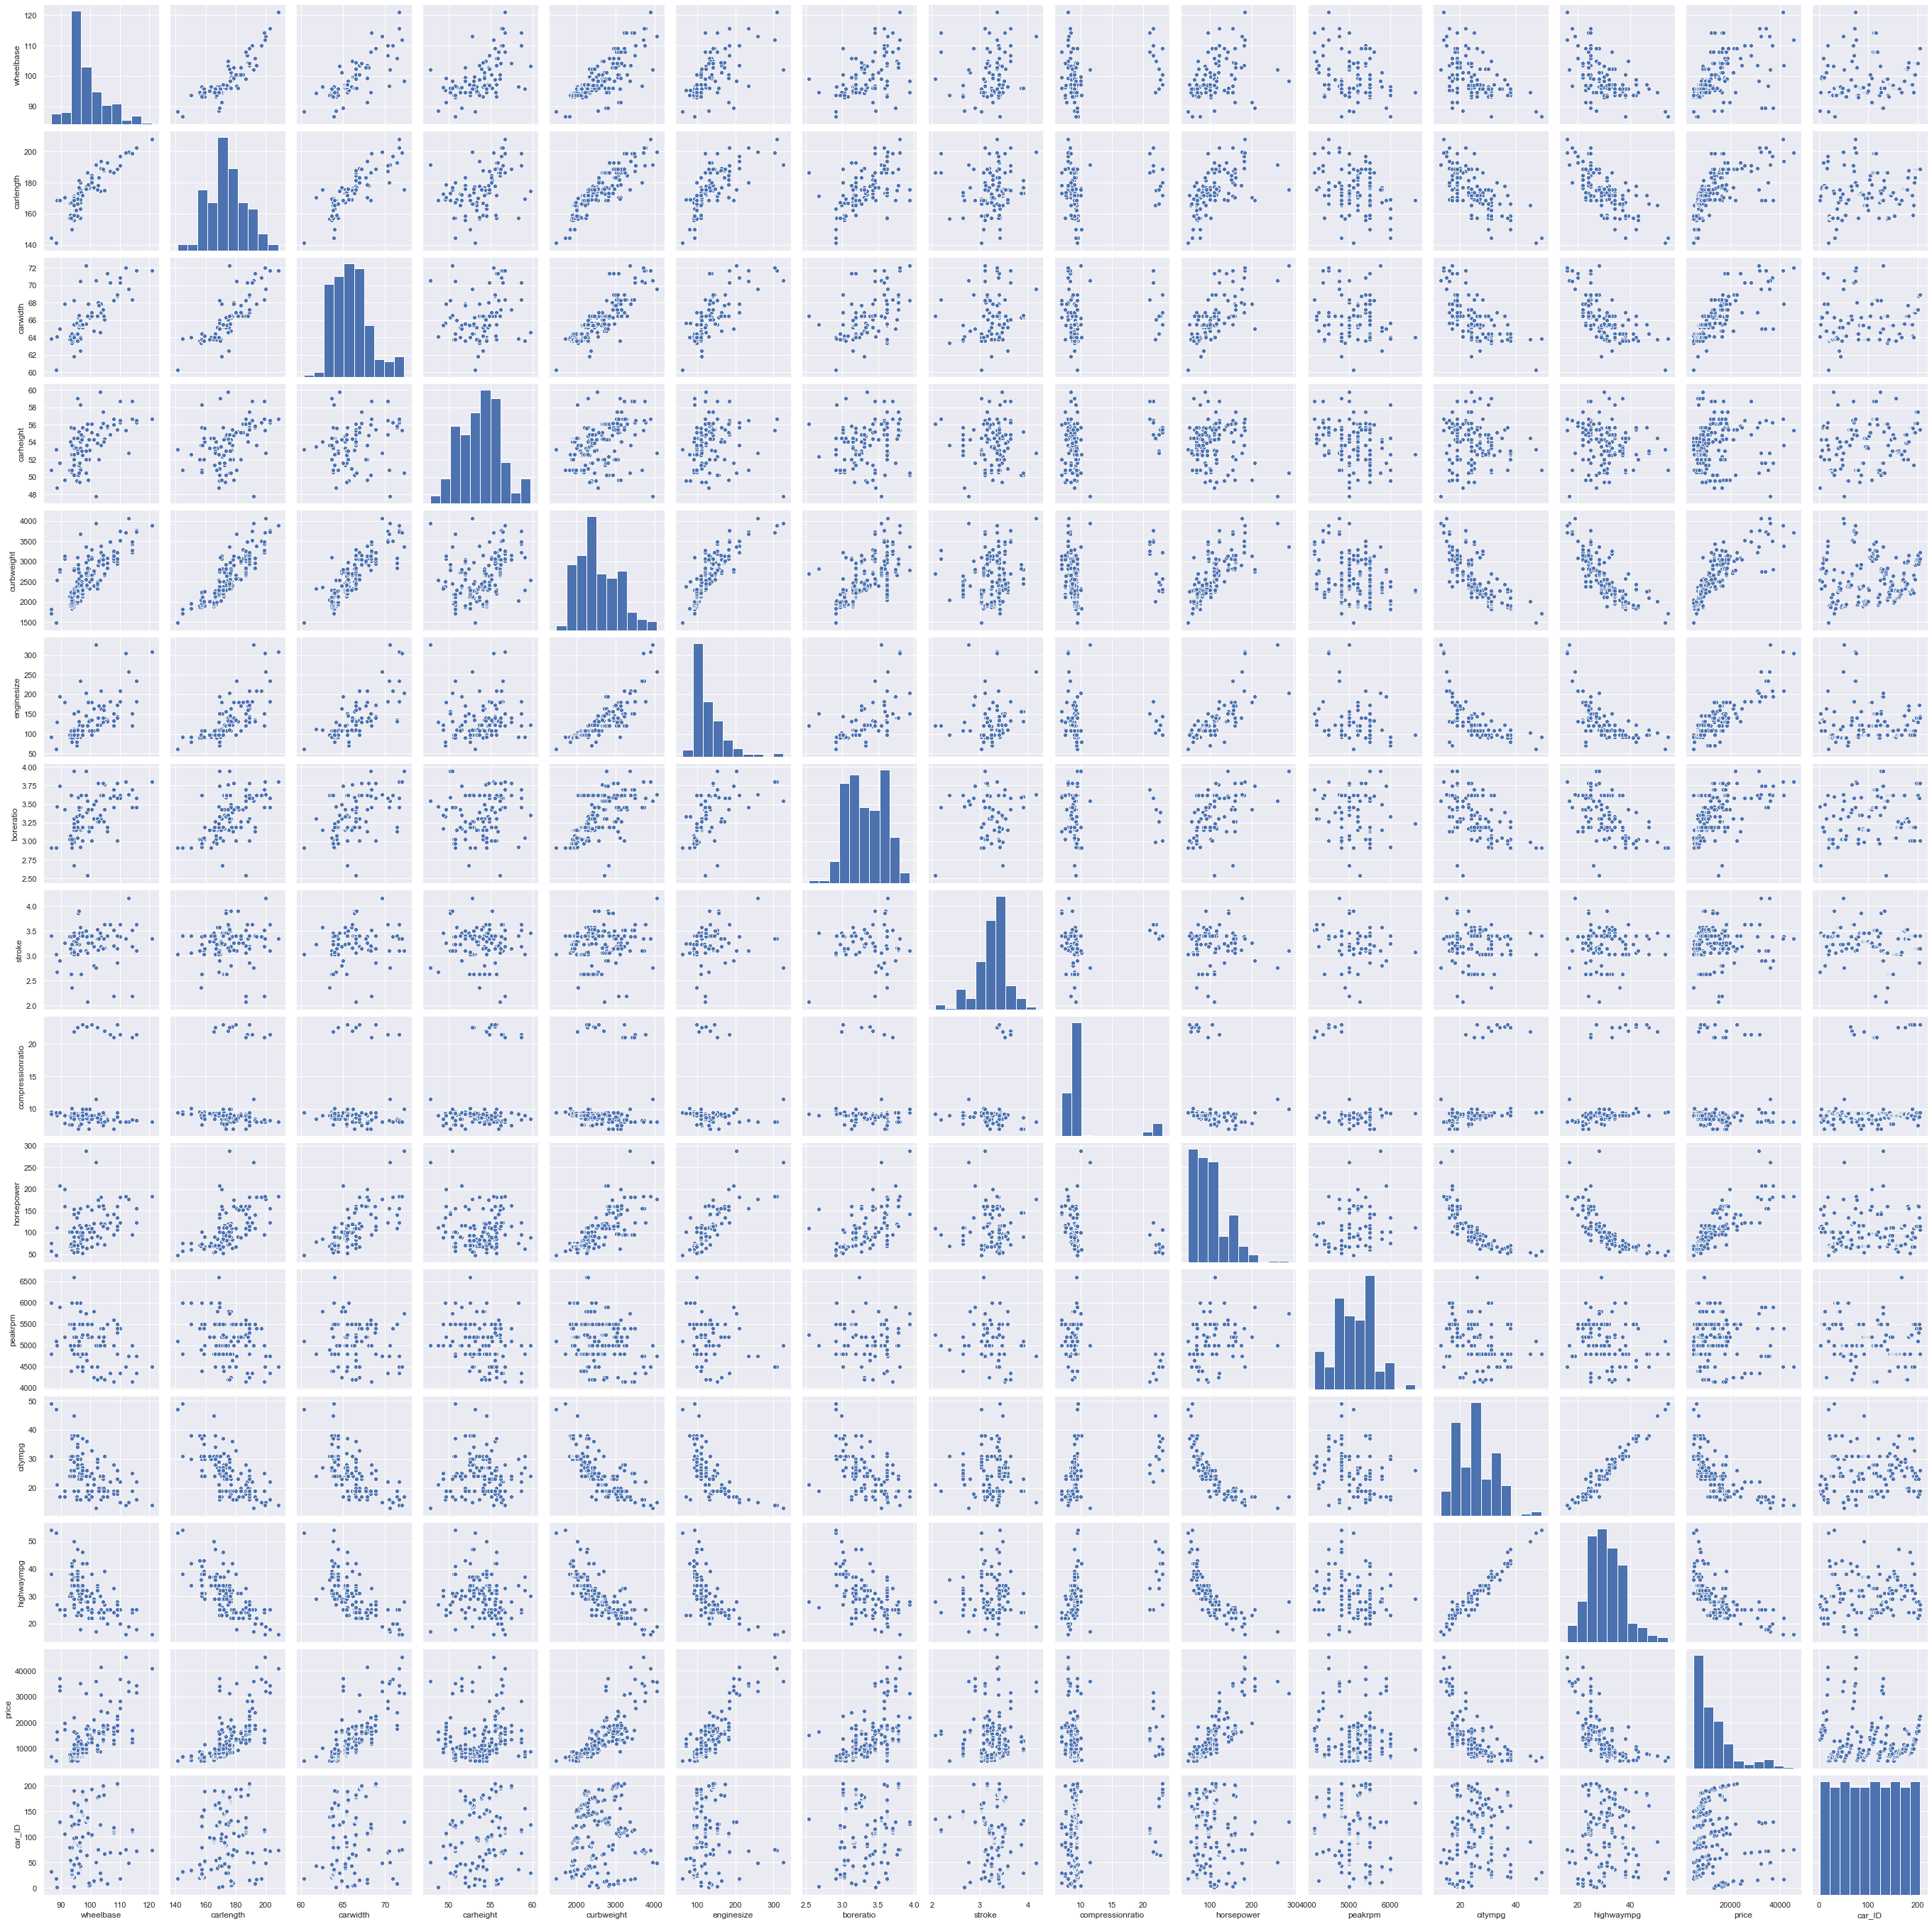

In [15]:
sns.pairplot(numeric_dataset)

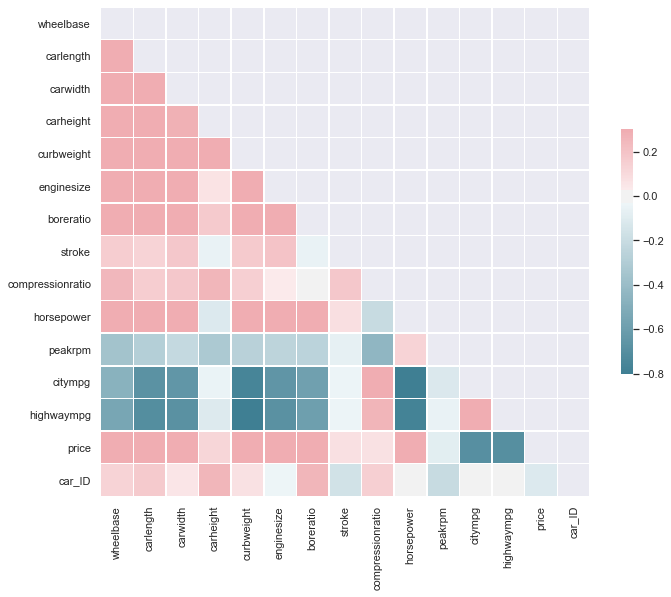

In [16]:
import numpy as np

corr = numeric_dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Merging both the data numberic as well as categorical data.

In [17]:
final_data = pd.merge(numeric_dataset, categorical_dataset, on='car_ID')

In [18]:
final_data.head(4)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Carmodel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,60,1,0,1,0,2,0,0,2,5
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,103,1,0,1,0,2,0,0,2,5
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,29,1,0,1,2,2,0,5,3,5
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,78,1,0,0,3,1,0,3,2,5


#### Now Splitting the dataset in train test with test size of 0.3

In [19]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(final_data, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Scaling the training data below  for the continuous variable only

In [20]:
scaler = MinMaxScaler()

In [21]:
num_vars = ["wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] =scaler.transform(df_test[num_vars])

df_train.head(3)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Carmodel,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,98,1,0,0,3,1,0,3,2,1
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,80,1,0,1,2,2,0,3,2,5
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,106,1,0,1,2,2,0,0,2,5


#### Training the model now with the given data :

In [22]:
y_train = df_train.pop('price')
X_train = df_train

In [23]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [24]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('car_ID', False, 7),
 ('symboling', False, 5),
 ('Carcompany', False, 3),
 ('Carmodel', False, 6),
 ('fueltype', True, 1),
 ('aspiration', False, 2),
 ('doornumber', True, 1),
 ('carbody', True, 1),
 ('drivewheel', True, 1),
 ('enginelocation', True, 1),
 ('enginetype', False, 4),
 ('cylindernumber', True, 1),
 ('fuelsystem', True, 1)]

#### List of significant varaibles we can start with building models.

In [25]:
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'cylindernumber', 'fuelsystem'],
      dtype='object')

#### Now we have list unsignificant columns below  just to know which variables will hardly help in predicting price of car:

In [26]:
X_train.columns[~rfe.support_]

Index(['car_ID', 'symboling', 'Carcompany', 'Carmodel', 'aspiration',
       'enginetype'],
      dtype='object')

#### Now in training data we will only pull those variable which can have significant impact on models starting with 20 features.

In [27]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [28]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

### Training the model .. .. .  . . .   .   .

In [29]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#### Model Showing different features coefficient and their significance based on p values...

In [30]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     39.56
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           8.65e-44
Time:                        13:55:22   Log-Likelihood:                 160.87
No. Observations:                 143   AIC:                            -279.7
Df Residuals:                     122   BIC:                            -217.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1303      0.247  

##### Calculate the VIFs for the new model

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1205.33
14,fueltype,75.03
9,compressionratio,72.74
12,citympg,31.15
13,highwaympg,28.99
5,curbweight,20.42
2,carlength,12.68
10,horsepower,10.80
6,enginesize,10.44
1,wheelbase,9.20


### Here I will proceed with the Backward step wise elimination techniqne for feature removal and final model selection.Parallely I will also check  VIF score for improvement.

In [32]:
X_train_new = X_train_rfe.drop(["wheelbase"], axis = 1)

In [33]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [34]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [35]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     41.98
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.32e-44
Time:                        13:55:24   Log-Likelihood:                 160.87
No. Observations:                 143   AIC:                            -281.7
Df Residuals:                     123   BIC:                            -222.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1315      0.245  

In [36]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1198.41
13,fueltype,72.18
8,compressionratio,69.42
11,citympg,29.66
12,highwaympg,28.24
4,curbweight,20.20
1,carlength,11.62
5,enginesize,10.35
9,horsepower,10.05
2,carwidth,7.08


In [37]:
X_train_new = X_train_new.drop(["doornumber"], axis = 1)

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [39]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [40]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     44.67
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.95e-45
Time:                        13:55:25   Log-Likelihood:                 160.86
No. Observations:                 143   AIC:                            -283.7
Df Residuals:                     124   BIC:                            -227.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1356      0.241  

In [41]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1167.74
13,fueltype,72.01
8,compressionratio,69.32
11,citympg,29.44
12,highwaympg,27.89
4,curbweight,19.92
1,carlength,11.34
5,enginesize,10.31
9,horsepower,9.85
2,carwidth,7.08


In [42]:
X_train_new = X_train_new.drop(["fueltype"], axis = 1)

In [43]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [44]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [45]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     46.98
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           6.05e-46
Time:                        13:55:26   Log-Likelihood:                 159.95
No. Observations:                 143   AIC:                            -283.9
Df Residuals:                     125   BIC:                            -230.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1477      0.088  

In [46]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,155.08
11,citympg,29.16
12,highwaympg,26.61
4,curbweight,18.32
1,carlength,10.90
9,horsepower,9.85
5,enginesize,8.90
2,carwidth,7.02
3,carheight,2.66
8,compressionratio,2.58


In [47]:
X_train_new = X_train_new.drop(["highwaympg"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     50.22
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           9.23e-47
Time:                        13:55:26   Log-Likelihood:                 159.84
No. Observations:                 143   AIC:                            -285.7
Df Residuals:                     126   BIC:                            -235.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1423      0.087  

In [48]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,152.11
4,curbweight,16.81
1,carlength,10.82
9,horsepower,9.37
5,enginesize,8.82
2,carwidth,7.00
11,citympg,6.63
3,carheight,2.63
8,compressionratio,2.58
16,fuelsystem,2.45


In [49]:
X_train_new = X_train_new.drop(["citympg"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     53.94
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.30e-47
Time:                        13:55:27   Log-Likelihood:                 159.78
No. Observations:                 143   AIC:                            -287.6
Df Residuals:                     127   BIC:                            -240.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1633      0.058  

In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,67.50
4,curbweight,13.83
1,carlength,10.09
9,horsepower,9.03
5,enginesize,8.04
2,carwidth,6.99
3,carheight,2.61
15,fuelsystem,2.41
6,boreratio,2.27
10,peakrpm,2.24


In [51]:
X_train_new = X_train_new.drop(["cylindernumber"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     58.03
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.06e-48
Time:                        13:55:27   Log-Likelihood:                 159.54
No. Observations:                 143   AIC:                            -289.1
Df Residuals:                     128   BIC:                            -244.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1486      0.053  

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.37
4,curbweight,13.57
1,carlength,9.84
9,horsepower,8.66
5,enginesize,7.55
2,carwidth,6.21
3,carheight,2.38
14,fuelsystem,2.35
6,boreratio,2.26
10,peakrpm,2.24


In [53]:
X_train_new = X_train_new.drop(["carlength"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     62.68
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           3.29e-49
Time:                        13:55:27   Log-Likelihood:                 159.24
No. Observations:                 143   AIC:                            -290.5
Df Residuals:                     129   BIC:                            -249.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1405      0.052  

In [54]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,54.79
3,curbweight,11.34
8,horsepower,7.83
4,enginesize,7.51
1,carwidth,4.91
2,carheight,2.28
9,peakrpm,2.24
5,boreratio,2.18
13,fuelsystem,2.13
7,compressionratio,1.78


In [55]:
X_train_new = X_train_new.drop(["carheight"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     68.14
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           4.90e-50
Time:                        13:55:28   Log-Likelihood:                 158.98
No. Observations:                 143   AIC:                            -292.0
Df Residuals:                     130   BIC:                            -253.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1328      0.050  

In [56]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.20
2,curbweight,10.13
3,enginesize,7.38
7,horsepower,7.05
1,carwidth,4.84
8,peakrpm,2.21
4,boreratio,2.17
12,fuelsystem,2.12
6,compressionratio,1.78
10,drivewheel,1.74


In [57]:
X_train_new = X_train_new.drop(["compressionratio"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     74.37
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           8.23e-51
Time:                        13:55:28   Log-Likelihood:                 158.54
No. Observations:                 143   AIC:                            -293.1
Df Residuals:                     131   BIC:                            -257.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1303      0.050     -2.

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.04
2,curbweight,9.95
3,enginesize,7.28
6,horsepower,6.76
1,carwidth,4.63
4,boreratio,2.17
11,fuelsystem,2.08
7,peakrpm,2.00
9,drivewheel,1.63
8,carbody,1.34


In [59]:
X_train_new = X_train_new.drop(["horsepower"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     81.70
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.46e-51
Time:                        13:55:28   Log-Likelihood:                 157.99
No. Observations:                 143   AIC:                            -294.0
Df Residuals:                     132   BIC:                            -261.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1417      0.049     -2.

In [60]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.42
2,curbweight,9.81
1,carwidth,4.62
3,enginesize,4.62
4,boreratio,2.15
10,fuelsystem,1.80
8,drivewheel,1.63
7,carbody,1.32
6,peakrpm,1.28
5,stroke,1.27


In [61]:
X_train_new = X_train_new.drop(["carbody"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     90.39
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           2.90e-52
Time:                        13:55:29   Log-Likelihood:                 157.26
No. Observations:                 143   AIC:                            -294.5
Df Residuals:                     133   BIC:                            -264.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1742      0.040     -4.

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,33.32
2,curbweight,8.69
1,carwidth,4.62
3,enginesize,4.34
4,boreratio,2.15
9,fuelsystem,1.71
7,drivewheel,1.52
5,stroke,1.27
6,peakrpm,1.27
8,enginelocation,1.16


In [63]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     99.39
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.56e-52
Time:                        13:55:30   Log-Likelihood:                 155.40
No. Observations:                 143   AIC:                            -292.8
Df Residuals:                     134   BIC:                            -266.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2149      0.034     -6.

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.62
2,curbweight,8.55
1,carwidth,4.43
3,enginesize,4.34
8,fuelsystem,1.67
6,drivewheel,1.50
5,peakrpm,1.20
7,enginelocation,1.13
4,stroke,1.09


In [65]:
X_train_new = X_train_new.drop(["stroke"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     112.1
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           4.49e-53
Time:                        13:55:30   Log-Likelihood:                 154.16
No. Observations:                 143   AIC:                            -292.3
Df Residuals:                     135   BIC:                            -268.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2456      0.028     -8.

In [66]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.51
2,curbweight,8.53
1,carwidth,4.40
3,enginesize,4.27
7,fuelsystem,1.67
5,drivewheel,1.50
4,peakrpm,1.20
6,enginelocation,1.11


In [67]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     123.0
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.97e-52
Time:                        13:55:31   Log-Likelihood:                 149.98
No. Observations:                 143   AIC:                            -286.0
Df Residuals:                     136   BIC:                            -265.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2487      0.029     -8.

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.49
2,enginesize,3.01
1,carwidth,2.60
6,fuelsystem,1.52
4,drivewheel,1.43
3,peakrpm,1.14
5,enginelocation,1.11


In [69]:
X_train_new.columns

Index(['const', 'carwidth', 'enginesize', 'peakrpm', 'drivewheel',
       'enginelocation', 'fuelsystem'],
      dtype='object')

In [70]:
df_test = df_test[['carwidth', 'enginesize', 'peakrpm', 'drivewheel',
       'enginelocation', 'fuelsystem','price']]

### Dividing into X_test and y_test

In [71]:


y_test = df_test.pop('price')
X_test = df_test

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
#X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

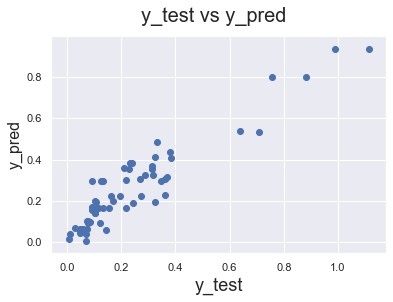

In [72]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [73]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

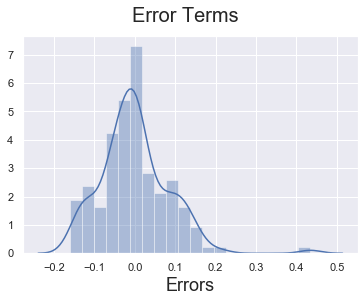

In [74]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)           

### Mean of the Residuals
Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out

In [75]:
residuals = y_test-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
print("Hence it is very close to zero")

Mean of Residuals -0.02053803822749339
Hence it is very close to zero


### Check for Homoscedasticicty
Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

#### Detecting heteroscedasticity!
Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values( Yi^). If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

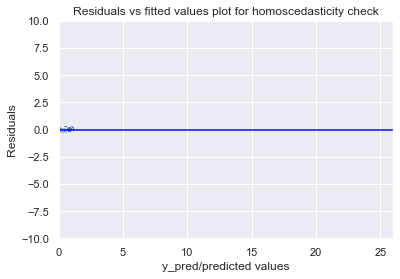

In [76]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

##### Now we will be applying tests.
A tip is to keep in mind that if we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis. Remember, a researcher or data scientist would always aim to reject the null hypothesis.

### Goldfeld Quandt Test
Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic
Alternative Hypothesis: Error terms are heteroscedastic.

In [77]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals,df_test )
lzip(name, test)

[('F statistic', 0.6255776108793445), ('p-value', 0.8761247233932774)]

#### Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. Good.


## No autocorrelation of the residuals

### When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.
In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.

### There should not be autocorrelation in the data so the error terms should not form any pattern.

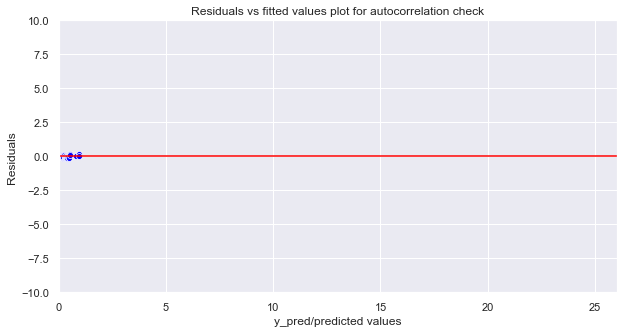

In [78]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

### Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.
-Null Hypothesis: Autocorrelation is absent.
-Alternative Hypothesis: Autocorrelation is present.

In [79]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.7635386844131149

Since p value is not less than 0.05 we accept the null hypothesis that error terms are  autocorrelated.

#### Evaluating the rmse value for our result is:

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

In [82]:
rmse = rmse(y_test,y_pred)

In [83]:
print("RMSE: %f" % (rmse))

RMSE: 0.082736


#### The evaluation of R2 on test and pred data is given below:

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.871928189139529